<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">


</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Modelización de los Datos




Se busca agrupar los países Europeos por Similitud en las variables:

* Causas de Mortalidad
    * Mortalidad Tratable
    * Mortalidad prevenible
    * Mortalidad por neumonía

* Prevención
    * Detección de Cáncer de Mama
    * Detección de Cáncer de Cérvix Uterino
    * Vacunación a la población mayor de 65 años

Se establecen patrones entre los países europeos teniendo en cuenta el índice de mortalidad y la prevención llevada a cabo en los años 2011-2017.

Para ello se importan en primer lugar las siguientes librerías:

In [1]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algoritmos de clustering.
from sklearn import datasets     # Crear datasets.
from sklearn import manifold     # Algoritmos de reduccion de dimensionalidad.
from sklearn.cluster import KMeans

# Visualizacion.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Se procede a continuación a la carga de datos:

In [2]:
camas_disponibles=pd.read_csv("C:/temp/Camas_Disponibles_Analisis.csv",sep= ",")
cuidados=pd.read_csv("C:/temp/Cuidados_Domiciliarios_Analisis.csv",sep= ",")
estado=pd.read_csv("C:/temp/Estado_Salud_Analisis.csv",sep= ",")
financiacion=pd.read_csv("C:/temp/Financiacion.csv",sep= ",")
gasto=pd.read_csv("C:/temp/GastoSanitario_Analisis.csv",sep= ",")
medicos=pd.read_csv("C:/temp/Medicos_Analisis.csv",sep= ",")
mortalidad=pd.read_csv("C:/temp/Mortalidad_Analisis.csv",sep= ",")
ocupacion_cama=pd.read_csv("C:/temp/Ocupacion_Cama_Analisis.csv",sep= ",")
personalSanitarioNoMedicos=pd.read_csv("C:/temp/PersonalSanitarioNoMedicos_Analisis.csv",sep= ",")
prevencion=pd.read_csv("C:/temp/Prevencion_Analisis.csv",sep= ",")
ratio_Pacientes_Dialisis=pd.read_csv("C:/temp/Ratio_Pacientes_Dialisis_Analisis.csv",sep= ",")
ratio_Pacientes_Trasplantados=pd.read_csv("C:/temp/Ratio_Pacientes_Trasplantados_Analisis.csv",sep= ",")
recursos_tecnologicos=pd.read_csv("C:/temp/Recursos_Tecnologicos_Analisis.csv",sep= ",")
tecnologia_medica=pd.read_csv("C:/temp/Tecnologia_Medica_Analisis.csv",sep= ",")

**MORTALIDAD**

In [3]:
#Visualización del archivo mortalidad y sus atributos
mortalidad.head()

,TIME,Pais,Mortalidad_Prevenible,Mortalidad_Tratable,Mortalidad_A00_B99,Mortalidad_G00_R50,Mortalidad_pneumonia,Other_sepsis
0,2011,Belgium,15883.5,7459.5,1148,2994,3260,1148
1,2011,Bulgaria,15459.5,13422.5,233,1227,1200,233
2,2011,Czechia,20972.5,13383.5,714,2336,2073,714
3,2011,Denmark,9022.0,4445.0,250,1954,890,250
4,2011,Germany (until 1990 former territory of the FRG),127461.0,74029.0,7411,15593,18020,7411


Estadística Descriptiva: 
               TIME  Mortalidad_Prevenible  Mortalidad_Tratable  \
count   238.000000             238.000000           238.000000   
mean   2014.000000           25246.100840         14927.031513   
std       2.004215           30574.832229         18278.457000   
min    2011.000000              31.000000            16.000000   
25%    2012.000000            5565.625000          2889.500000   
50%    2014.000000           12088.250000          6690.000000   
75%    2016.000000           30437.500000         16564.875000   
max    2017.000000          127461.000000         74029.000000   

       Mortalidad_A00_B99  Mortalidad_G00_R50  Mortalidad_pneumonia  \
count          238.000000          238.000000            238.000000   
mean          1335.323529         3958.537815           3890.247899   
std           2136.041623         5241.106308           6172.407590   
min              1.000000            1.000000              1.000000   
25%             76.7500

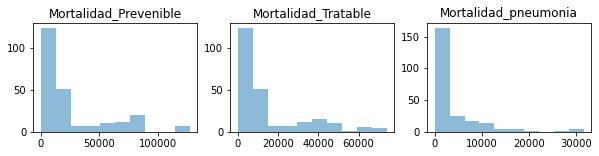

In [4]:
#Visualización de las variables antes de procesarlas para que tengan el mismo peso
#Histograma
fix,ax=plt.subplots(1,3,figsize=(10,2))#Creamos las figuras
atributos=["Mortalidad_Prevenible","Mortalidad_Tratable","Mortalidad_pneumonia"]#Atributos de estudio
for i,atr in enumerate(atributos): #Por cada atributo y por cada clase de mortalidad...
    ax[i].hist(mortalidad.loc[:, atr], alpha=0.5)
    ax[i].set_title(atr)
    
#Estadística descriptiva
print ('Estadística Descriptiva: \n',mortalidad.describe())

De las gráficas se deduce que las mortalidades más frecuentes se encuentran en el rango [0,20000] unidades.

DIAGRAMAS DE CAJA: Mortalidad_Prevenible, Mortalidad_Tratable, Mortalidad_pneumonia


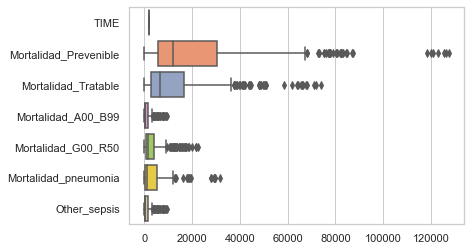

Diagrama de caja:  Mortalidad_Prevenible


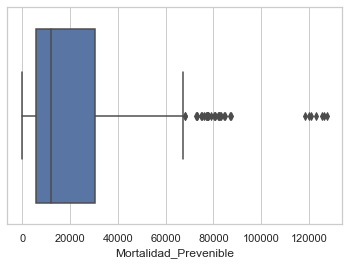

Diagrama de caja:  Mortalidad_Tratable


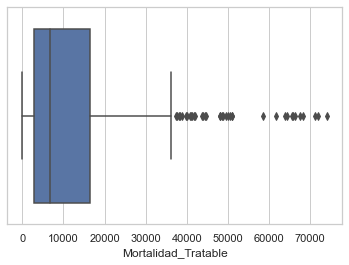

Diagrama de caja:  Mortalidad_pneumonia


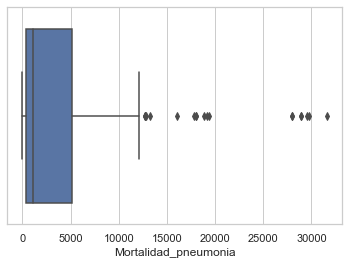

In [5]:
#Diagramas de caja 

sns.set(style="whitegrid")
print("DIAGRAMAS DE CAJA: Mortalidad_Prevenible, Mortalidad_Tratable, Mortalidad_pneumonia")
ax = sns.boxplot(data=mortalidad, orient='h',palette="Set2")
plt.show()
for j,atr2 in enumerate (atributos):
    print ("Diagrama de caja: ", atr2)
    ax2 = sns.boxplot(x=mortalidad[atr2])
    plt.show()

In [6]:
#Normalización de variables para que tengan el mismo peso
#Importamos primero las librerias necesarias.
#La normalización aplicada en este caso sigue la siguiente formula:
#normalización = ( x – min(x) ) / ( max(x) – min(x) )

#Importamos las librerías necesarias
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


mortalidad_2=pd.DataFrame(mortalidad,columns=['Mortalidad_Prevenible', 'Mortalidad_Tratable', 'Mortalidad_pneumonia'])
mortalidad_vnorm=scaler.fit_transform(mortalidad_2)
mortalidad_vnorm=pd.DataFrame(mortalidad_vnorm,columns=['Mortalidad_Prevenible', 'Mortalidad_Tratable', 'Mortalidad_pneumonia'])
mortalidad_vnorm

,Mortalidad_Prevenible,Mortalidad_Tratable,Mortalidad_pneumonia
0,0.124402,0.100570,0.103159
1,0.121074,0.181137,0.037953
2,0.164337,0.180610,0.065586
3,0.070556,0.059841,0.028140
4,1.000000,1.000000,0.570366
...,...,...,...
233,0.042188,0.037318,0.049854
234,0.063921,0.052038,0.042068
235,0.683732,0.687231,0.934287
236,0.126634,0.159553,0.039947


In [7]:
#Añadimos las columnas de TIME y Pais al dataframe
mortalidad_df=pd.DataFrame(mortalidad_vnorm,columns=['Mortalidad_Prevenible', 'Mortalidad_Tratable', 'Mortalidad_pneumonia'])
mortalidad_df['TIME']=mortalidad.loc[:,"TIME"]
mortalidad_df['Pais']=mortalidad.loc[:,"Pais"]
mortalidad_df

,Mortalidad_Prevenible,Mortalidad_Tratable,Mortalidad_pneumonia,TIME,Pais
0,0.124402,0.100570,0.103159,2011,Belgium
1,0.121074,0.181137,0.037953,2011,Bulgaria
2,0.164337,0.180610,0.065586,2011,Czechia
3,0.070556,0.059841,0.028140,2011,Denmark
4,1.000000,1.000000,0.570366,2011,Germany (until 1990 former territory of the FRG)
...,...,...,...,...,...
233,0.042188,0.037318,0.049854,2017,Norway
234,0.063921,0.052038,0.042068,2017,Switzerland
235,0.683732,0.687231,0.934287,2017,United Kingdom
236,0.126634,0.159553,0.039947,2017,Serbia



Para estimar el número de Clusters a detectar por *k-means* se utiliza lo que popularmente se conoce como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al pertenece el punto $x$), y $euclidean$ es la [distancia euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se observa un significativo descenso del error, que indicará el valor idóneo de $k$.


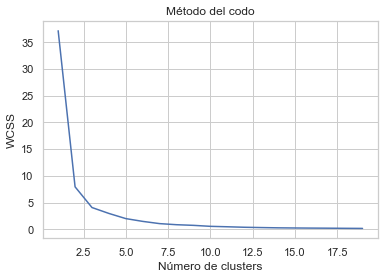

In [8]:
#CURVA DEL CODO

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

wcss=[] #Within cluster sum of squares
for i in range (1,20): #Rango de 1 a 20
    kmeans=KMeans(n_clusters= i, max_iter=300)#Modelo con el método de Kmeans, 300 iteraciones para cada kmeans
    kmeans.fit(mortalidad_vnorm)#Aplicamos el modelo
    wcss.append(kmeans.inertia_)# SSE

plt.plot(range(1,20), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')#Indica como de similares son los individuos dentro del cluster.
plt.show()

In [9]:
#Aplicando el modelo Kmeans al dataset
clustering=KMeans(n_clusters=3,max_iter=300)#Creamos el modelo
clustering.fit(mortalidad_vnorm)#Aplicamos el modelo

mortalidad['Kmeans_clusters']=clustering.labels_
mortalidad_vnorm['Kmeans_clusters']=clustering.labels_

print ('Centroides: \n',clustering.cluster_centers_)
print(mortalidad.head())



Centroides: 
 [[0.07628674 0.07699895 0.03660441]
 [0.51315732 0.52413968 0.28356309]
 [0.79272272 0.81058015 0.705958  ]]
   TIME                                              Pais  \
0  2011                                           Belgium   
1  2011                                          Bulgaria   
2  2011                                           Czechia   
3  2011                                           Denmark   
4  2011  Germany (until 1990 former territory of the FRG)   

   Mortalidad_Prevenible  Mortalidad_Tratable  Mortalidad_A00_B99  \
0                15883.5               7459.5                1148   
1                15459.5              13422.5                 233   
2                20972.5              13383.5                 714   
3                 9022.0               4445.0                 250   
4               127461.0              74029.0                7411   

   Mortalidad_G00_R50  Mortalidad_pneumonia  Other_sepsis  Kmeans_clusters  
0                2

In [10]:
#PARA 2011 Y MORTALIDAD
#=======================
is_2011=mortalidad.loc[:,"TIME"]==2011 #Se selecciona los registros para 2011
mortalidad_2011=mortalidad[is_2011]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(mortalidad_2011)):
    if mortalidad_2011.iloc[i,8]==0: #Si en la columna cluster , ese registro tiene valor 0
        paises_0.append(mortalidad_2011.iloc[i,1])#Se añade el nombre del Pais a la lista de paises_0
    elif mortalidad_2011.iloc[i,8]==1:
        paises_1.append(mortalidad_2011.iloc[i,1])
    else: paises_2.append(mortalidad_2011.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania', 'Turkey']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom']


In [11]:
#PARA 2012 Y MORTALIDAD
#=======================
is_2012=mortalidad.loc[:,"TIME"]==2013 #Se selecciona los registros para 2011
mortalidad_2012=mortalidad[is_2012]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2012)):
    if mortalidad_2012.iloc[i,8]==0:
        paises_0.append(mortalidad_2012.iloc[i,1])
    elif mortalidad_2012.iloc[i,8]==1:
        paises_1.append(mortalidad_2012.iloc[i,1])
    else: paises_2.append(mortalidad_2012.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))


Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania', 'Turkey']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom']


In [12]:
#PARA 2013 Y MORTALIDAD
#=======================
is_2013=mortalidad.loc[:,"TIME"]==2013 #Se selecciona los registros para 2011
mortalidad_2013=mortalidad[is_2013]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2013)):
    if mortalidad_2013.iloc[i,8]==0:
        paises_0.append(mortalidad_2013.iloc[i,1])
    elif mortalidad_2013.iloc[i,8]==1:
        paises_1.append(mortalidad_2013.iloc[i,1])
    else: paises_2.append(mortalidad_2013.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania', 'Turkey']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom']


In [13]:
#PARA 2014 Y MORTALIDAD
#=======================
is_2014=mortalidad.loc[:,"TIME"]==2014 #Se selecciona los registros para 2011
mortalidad_2014=mortalidad[is_2014]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2014)):
    if mortalidad_2014.iloc[i,8]==0:
        paises_0.append(mortalidad_2014.iloc[i,1])
    elif mortalidad_2014.iloc[i,8]==1:
        paises_1.append(mortalidad_2014.iloc[i,1])
    else: paises_2.append(mortalidad_2014.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania', 'Turkey']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom']


In [14]:
#PARA 2015 Y MORTALIDAD
#=======================
is_2015=mortalidad.loc[:,"TIME"]==2015 #Se selecciona los registros para 2011
mortalidad_2015=mortalidad[is_2015]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2015)):
    if mortalidad_2015.iloc[i,8]==0:
        paises_0.append(mortalidad_2015.iloc[i,1])
    elif mortalidad_2014.iloc[i,8]==1:
        paises_1.append(mortalidad_2015.iloc[i,1])
    else: paises_2.append(mortalidad_2015.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania', 'Turkey']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom']


In [15]:
#PARA 2016 Y MORTALIDAD
#=======================
is_2016=mortalidad.loc[:,"TIME"]==2016 #Se selecciona los registros para 2011
mortalidad_2016=mortalidad[is_2016]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2016)):
    if mortalidad_2015.iloc[i,8]==0:
        paises_0.append(mortalidad_2016.iloc[i,1])
    elif mortalidad_2016.iloc[i,8]==1:
        paises_1.append(mortalidad_2016.iloc[i,1])
    else: paises_2.append(mortalidad_2016.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom', 'Turkey']


In [16]:
#PARA 2017 Y MORTALIDAD
#=======================
is_2017=mortalidad.loc[:,"TIME"]==2017 #Se selecciona los registros para 2011
mortalidad_2017=mortalidad[is_2017]

#Se generan listas con los paises agrupados por similitud en la mortalidad
paises_0=[]
paises_1=[]
paises_2=[]
for i in range (0,len(mortalidad_2017)):
    if mortalidad_2017.iloc[i,8]==0:
        paises_0.append(mortalidad_2017.iloc[i,1])
    elif mortalidad_2017.iloc[i,8]==1:
        paises_1.append(mortalidad_2017.iloc[i,1])
    else: paises_2.append(mortalidad_2017.iloc[i,1])
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Estonia', 'Ireland', 'Greece', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Portugal', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Serbia']
Países agrupados en 1: 
 ['Spain', 'France', 'Italy', 'Poland', 'Romania']
Países agrupados en 2: 
 ['Germany (until 1990 former territory of the FRG)', 'United Kingdom', 'Turkey']


**PREVENCIÓN**

In [17]:
#Visualización del archivo prevencion y sus atributos
prevencion.head()
prevencion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TIME                             360 non-null    int64  
 1   Pais                             360 non-null    object 
 2   Deteccion_cancer_mama            360 non-null    float64
 3   Deteccion_cancer_cervix_uterino  360 non-null    float64
 4   Vacunacion                       360 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.2+ KB


Estadística Descriptiva: 
               TIME  Deteccion_cancer_mama  Deteccion_cancer_cervix_uterino  \
count   360.000000             360.000000                       360.000000   
mean   2014.500000              68.791361                        69.488472   
std       2.876279              12.092740                         9.835996   
min    2010.000000               6.400000                        23.400000   
25%    2012.000000              67.400000                        68.100000   
50%    2014.500000              72.000000                        70.700000   
75%    2017.000000              75.000000                        75.520000   
max    2019.000000              90.400000                        87.200000   

       Vacunacion  
count  360.000000  
mean    34.990722  
std     19.963615  
min      0.900000  
25%     14.725000  
50%     39.820000  
75%     50.000000  
max     74.000000  


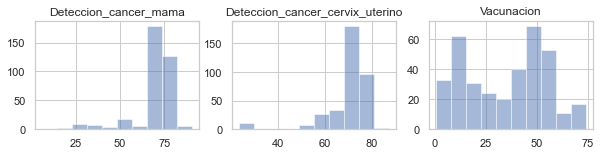

In [18]:
#Visualización de las variables antes de procesarlas para que tengan el mismo peso
#Histograma
fix,ax=plt.subplots(1,3,figsize=(10,2))#Creamos las figuras
atributos=["Deteccion_cancer_mama","Deteccion_cancer_cervix_uterino","Vacunacion"]#Atributos de estudio
for i,atr in enumerate(atributos): #Por cada atributo y por cada clase de actividad preventiva...
    ax[i].hist(prevencion.loc[:, atr], alpha=0.5)
    ax[i].set_title(atr)
    
#Estadística descriptiva
print ('Estadística Descriptiva: \n',prevencion.describe())

DIAGRAMAS DE CAJA: Deteccion_cancer_mama,Deteccion_cancer_cervix_uterino,Vacunacion


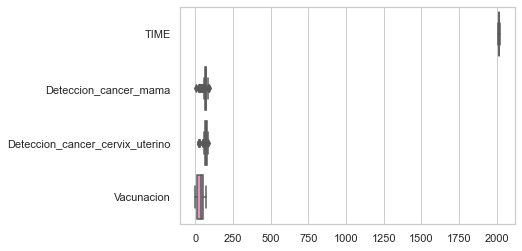

Diagrama de caja:  Deteccion_cancer_mama


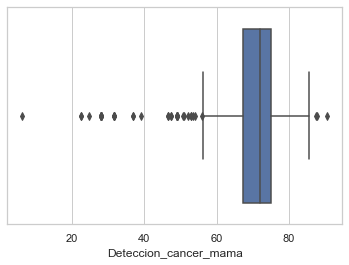

Diagrama de caja:  Deteccion_cancer_cervix_uterino


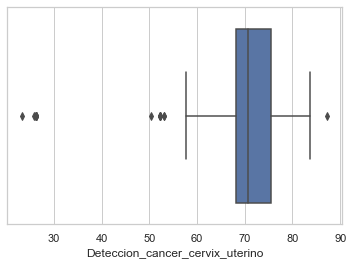

Diagrama de caja:  Vacunacion


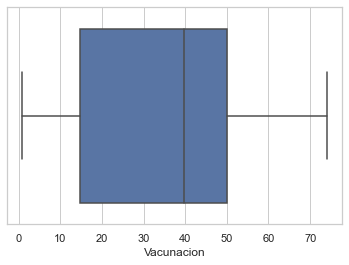

In [19]:
#Diagramas de caja 

sns.set(style="whitegrid")
print("DIAGRAMAS DE CAJA: Deteccion_cancer_mama,Deteccion_cancer_cervix_uterino,Vacunacion")
ax = sns.boxplot(data=prevencion, orient='h',palette="Set2")
plt.show()
for j,atr2 in enumerate (atributos):
    print ("Diagrama de caja: ", atr2)
    ax2 = sns.boxplot(x=prevencion[atr2])
    plt.show()

In [20]:
#Normalización de variables para que tengan el mismo peso
#Importamos primero las librerias necesarias.
#La normalización aplicada en este caso sigue la siguiente formula:
#normalización = ( x – min(x) ) / ( max(x) – min(x) )

scaler=MinMaxScaler()
#Creamos un DataFrame solo con la información numérica para normalizarla
prevencion_2=pd.DataFrame(prevencion,columns=["Deteccion_cancer_mama","Deteccion_cancer_cervix_uterino","Vacunacion"])
prevencion_vnorm=scaler.fit_transform(prevencion_2)#Normalizamos
prevencion_vnorm=pd.DataFrame(prevencion_vnorm,columns=["Deteccion_cancer_mama","Deteccion_cancer_cervix_uterino","Vacunacion"])
prevencion_vnorm.head()#Creamos un dataframe con la normalización

,Deteccion_cancer_mama,Deteccion_cancer_cervix_uterino,Vacunacion
0,0.725000,0.700627,0.781122
1,0.757143,0.748119,0.658550
2,0.821429,0.824451,0.226129
3,0.821429,0.748119,0.630643
4,0.772619,0.824451,0.755130


In [21]:
#Añadimos las columnas de TIME y Pais al dataframe normalizado
prevencion_df=pd.DataFrame(prevencion_vnorm,columns=["Deteccion_cancer_mama","Deteccion_cancer_cervix_uterino","Vacunacion"])
prevencion_df['TIME']=prevencion.loc[:,"TIME"]
prevencion_df['Pais']=prevencion.loc[:,"Pais"]
prevencion_df

,Deteccion_cancer_mama,Deteccion_cancer_cervix_uterino,Vacunacion,TIME,Pais
0,0.725000,0.700627,0.781122,2010,Belgium
1,0.757143,0.748119,0.658550,2010,Bulgaria
2,0.821429,0.824451,0.226129,2010,Czechia
3,0.821429,0.748119,0.630643,2010,Denmark
4,0.772619,0.824451,0.755130,2010,Germany (until 1990 former territory of the FRG)
...,...,...,...,...,...
355,0.725000,0.700627,0.972230,2019,United Kingdom
356,0.808333,0.700627,0.167715,2019,Montenegro
357,0.808333,0.700627,0.076607,2019,North Macedonia
358,0.194048,0.568966,0.139535,2019,Serbia


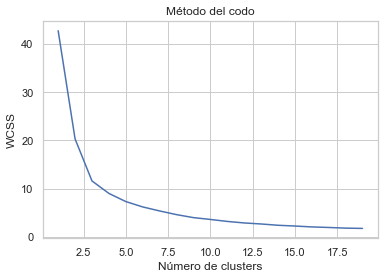

In [22]:
#CURVA DEL CODO
wcss=[] #Within cluster sum of squares (suma de los errores cuadráticos)
for i in range (1,20): #Rango de 1 a 20
    kmeans=KMeans(n_clusters= i, max_iter=300)#Modelo con el método de Kmeans, 300 iteraciones para cada kmeans
    kmeans.fit(prevencion_vnorm)#Aplicamos el modelo
    wcss.append(kmeans.inertia_)# SSE

plt.plot(range(1,20), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')#Indica como de similares son los individuos dentro del cluster.
plt.show()

In [23]:
#Aplicando el modelo Kmeans al dataset
clustering=KMeans(n_clusters=3,max_iter=300)#Creamos el modelo
clustering.fit(prevencion_vnorm)#Aplicamos el modelo

prevencion['Kmeans_clusters']=clustering.labels_
prevencion_vnorm['Kmeans_clusters']=clustering.labels_

print ('Centroides: \n',clustering.cluster_centers_)
print(prevencion.head())

Centroides: 
 [[0.7586222  0.73969897 0.1959755 ]
 [0.78460021 0.76199956 0.68072769]
 [0.28322981 0.27388578 0.19172664]]
   TIME                                              Pais  \
0  2010                                           Belgium   
1  2010                                          Bulgaria   
2  2010                                           Czechia   
3  2010                                           Denmark   
4  2010  Germany (until 1990 former territory of the FRG)   

   Deteccion_cancer_mama  Deteccion_cancer_cervix_uterino  Vacunacion  \
0                   67.3                            68.10       58.00   
1                   70.0                            71.13       49.04   
2                   75.4                            76.00       17.43   
3                   75.4                            71.13       47.00   
4                   71.3                            76.00       56.10   

   Kmeans_clusters  
0                1  
1                1  
2       

In [24]:
#PARA 2011 Y PREVENCION
#=======================
is_2011=prevencion.loc[:,"TIME"]==2011 #Se selecciona los registros para 2011
prevencion_2011=prevencion[is_2011]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2011)):
    if prevencion_2011.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2011.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2011.iloc[i,5]==1:
        paises_1.append(prevencion_2011.iloc[i,1])
    else: paises_2.append(prevencion_2011.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Czechia', 'Estonia', 'Croatia', 'Latvia', 'Lithuania', 'Hungary', 'Romania', 'Slovenia', 'Slovakia', 'Liechtenstein', 'Norway', 'Montenegro', 'North Macedonia', 'Serbia']
Países agrupados en 1: 
 ['Belgium', 'Bulgaria', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus', 'Luxembourg', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Turkey']


In [25]:
#PARA 2012 Y PREVENCION
#=======================
is_2012=prevencion.loc[:,"TIME"]==2012 #Se selecciona los registros para 2012
prevencion_2012=prevencion[is_2012]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2012)):
    if prevencion_2012.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2012.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2012.iloc[i,5]==1:
        paises_1.append(prevencion_2012.iloc[i,1])
    else: paises_2.append(prevencion_2012.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Bulgaria', 'Czechia', 'Estonia', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Hungary', 'Austria', 'Poland', 'Romania', 'Slovenia', 'Slovakia', 'Norway', 'Montenegro', 'North Macedonia', 'Serbia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Liechtenstein', 'Turkey']


In [26]:
#PARA 2013 Y PREVENCION
#=======================
is_2013=prevencion.loc[:,"TIME"]==2013 #Se selecciona los registros para 2013
prevencion_2013=prevencion[is_2013]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2013)):
    if prevencion_2013.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2013.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2013.iloc[i,5]==1:
        paises_1.append(prevencion_2013.iloc[i,1])
    else: paises_2.append(prevencion_2013.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Bulgaria', 'Czechia', 'Estonia', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Hungary', 'Austria', 'Poland', 'Romania', 'Slovenia', 'Slovakia', 'Liechtenstein', 'Norway', 'Montenegro', 'North Macedonia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Serbia', 'Turkey']


In [27]:
#PARA 2014 Y PREVENCION
#=======================
is_2014=prevencion.loc[:,"TIME"]==2014 #Se selecciona los registros para 2014
prevencion_2014=prevencion[is_2014]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2014)):
    if prevencion_2014.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2014.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2014.iloc[i,5]==1:
        paises_1.append(prevencion_2014.iloc[i,1])
    else: paises_2.append(prevencion_2014.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Czechia', 'Croatia', 'Cyprus', 'Latvia', 'Hungary', 'Austria', 'Poland', 'Slovenia', 'Slovakia', 'Norway', 'Montenegro', 'North Macedonia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Luxembourg', 'Malta', 'Netherlands', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Bulgaria', 'Estonia', 'Lithuania', 'Romania', 'Liechtenstein', 'Serbia', 'Turkey']


In [28]:
#PARA 2015 Y PREVENCION
#=======================
is_2015=prevencion.loc[:,"TIME"]==2015 #Se selecciona los registros para 2015
prevencion_2015=prevencion[is_2015]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2015)):
    if prevencion_2015.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2015.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2015.iloc[i,5]==1:
        paises_1.append(prevencion_2015.iloc[i,1])
    else: paises_2.append(prevencion_2015.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Czechia', 'Estonia', 'Croatia', 'Latvia', 'Lithuania', 'Hungary', 'Romania', 'Slovenia', 'Slovakia', 'Liechtenstein', 'Norway', 'Montenegro', 'North Macedonia', 'Serbia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus', 'Luxembourg', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Bulgaria', 'Turkey']


In [29]:
#PARA 2016 Y PREVENCION
#=======================
is_2016=prevencion.loc[:,"TIME"]==2016 #Se selecciona los registros para 2016
prevencion_2016=prevencion[is_2016]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2016)):
    if prevencion_2016.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2016.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2016.iloc[i,5]==1:
        paises_1.append(prevencion_2016.iloc[i,1])
    else: paises_2.append(prevencion_2016.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Czechia', 'Estonia', 'Croatia', 'Latvia', 'Hungary', 'Romania', 'Slovenia', 'Slovakia', 'Liechtenstein', 'Montenegro', 'North Macedonia', 'Serbia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus', 'Luxembourg', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Bulgaria', 'Lithuania', 'Turkey']


In [30]:
#PARA 2017 Y PREVENCION
#=======================
is_2017=prevencion.loc[:,"TIME"]==2017 #Se selecciona los registros para 2016
prevencion_2017=prevencion[is_2017]

#Se generan listas con los paises agrupados por similitud en actividades de prevención 
paises_0=[]
paises_1=[]
paises_2=[]

for i in range (0,len(prevencion_2017)):
    if prevencion_2017.iloc[i,5]==0:#si la columna del cluster es 0
        paises_0.append(prevencion_2017.iloc[i,1])#Se agrega el nombre del pais a la lista de pais_0
    elif prevencion_2017.iloc[i,5]==1:
        paises_1.append(prevencion_2017.iloc[i,1])
    else: paises_2.append(prevencion_2017.iloc[i,1])
        
print ("Países agrupados en 0: \n {}".format(paises_0))
print ("Países agrupados en 1: \n {}".format(paises_1))
print ("Países agrupados en 2: \n {}".format(paises_2))

Países agrupados en 0: 
 ['Czechia', 'Estonia', 'Croatia', 'Latvia', 'Lithuania', 'Hungary', 'Romania', 'Slovenia', 'Slovakia', 'Liechtenstein', 'Montenegro', 'North Macedonia', 'Serbia']
Países agrupados en 1: 
 ['Belgium', 'Denmark', 'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus', 'Luxembourg', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland', 'United Kingdom']
Países agrupados en 2: 
 ['Bulgaria', 'Turkey']
